# Car Price Prediction
This notebook demonstrates the process of building a machine learning model to predict car prices based on various features such as mileage, engine size, fuel type, and more. The dataset used for this project is the 'CarDekho' dataset, which contains information on various cars along with their selling prices. The goal is to preprocess the data, explore it, build different regression models, and select the best model based on performance metrics.

## Overview
The notebook is organized into the following sections:

1. **Load Data**: Load the dataset and display its initial structure and summary statistics.
2. **Exploratory Data Analysis (EDA)**: Conduct a detailed analysis of the dataset to understand the distribution of data and relationships between features.
3. **Data Preprocessing**: Handle missing values, encode categorical variables, and address data skewness and outliers.
4. **Model Training and Evaluation**: Train multiple regression models, evaluate their performance using metrics such as mean squared error, and visualize actual vs. predicted values.
5. **Model Selection**: Identify the best-performing model based on evaluation metrics.
6. **Feature Importance Analysis**: Analyze the importance of different features in the best model.
7. **Save Models and Encoders**: Save the trained model and label encoders for future use.

By following these steps, we aim to build an effective model for predicting car prices and gain insights into the key factors influencing car prices.



In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Load data

In [175]:
raw_df = pd.read_csv('cardekho.csv')
raw_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [176]:
# Show the shape of the dataset
raw_df.shape

(8128, 12)

In [177]:
# Show some statistical information about dataset
raw_df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [178]:
columns_names = raw_df.columns
columns_names

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [179]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


# Exploratory data analysis

In [180]:
# Take copy from data to make processes on
preprocessed_df = deepcopy(raw_df)

# Show all types of columns in the data
preprocessed_df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [181]:
# Check about none values in data to decide if we will make data cleaning or not
preprocessed_df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

## Handling missing values

In [182]:
# Handle missing values of float columns that are mileage(km/ltr/kg), engine, seats
column_float_imputed = ['mileage(km/ltr/kg)', 'engine','seats']
preprocessed_df[column_float_imputed] = preprocessed_df[column_float_imputed].fillna(preprocessed_df[column_float_imputed].mean())
preprocessed_df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64

In [183]:
# Handle missing values of textual column max_power
max_power_col = 'max_power'
preprocessed_df[max_power_col] = preprocessed_df[max_power_col].fillna(preprocessed_df[max_power_col].mode()[0])

# Check about missing values again
preprocessed_df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

## Handling invalid data

In [184]:
# Get textual columns by select dtypes function
textual_columns = preprocessed_df.select_dtypes(include = ['object']).columns
textual_columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'max_power'], dtype='object')

In [185]:
preprocessed_df[textual_columns]

,name,fuel,seller_type,transmission,owner,max_power
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,74
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,103.52
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,78
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,90
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,88.2
...,...,...,...,...,...,...
8123,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner,82.85
8124,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner,110
8125,Maruti Swift Dzire ZDi,Diesel,Individual,Manual,First Owner,73.9
8126,Tata Indigo CR4,Diesel,Individual,Manual,First Owner,70


In [186]:
# Convert textual max power columns into numerical column
spaces_count = preprocessed_df['max_power'].apply(lambda x: x.count(' ')).sum()
spaces_count

np.int64(1)

In [187]:
# Replace each space with string zero
preprocessed_df['max_power'] = preprocessed_df['max_power'].str.replace(' ', '0')

# Convert max power column from textual into numerical
preprocessed_df['max_power'] = preprocessed_df['max_power'].astype(float)

In [188]:
textual_colmns = preprocessed_df.select_dtypes(include=['object'])
textual_columns_names = textual_colmns.columns
textual_colmns

,name,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...
8123,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner
8124,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner
8125,Maruti Swift Dzire ZDi,Diesel,Individual,Manual,First Owner
8126,Tata Indigo CR4,Diesel,Individual,Manual,First Owner


## Label encoding textual columns

In [189]:
# Dictionary to store the encoders
label_encoders = {}

# Fit and transform each textual column, saving the encoders
for col in textual_columns_names:
    label_encoder = LabelEncoder()
    preprocessed_df[col] = label_encoder.fit_transform(preprocessed_df[col])
    label_encoders[col] = label_encoder

preprocessed_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,1307,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0
1,1607,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,385,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0
3,781,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0
4,1349,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0


In [190]:
# Check about if there is any extra textual columns
preprocessed_df.select_dtypes(include=['object']).columns

Index([], dtype='object')

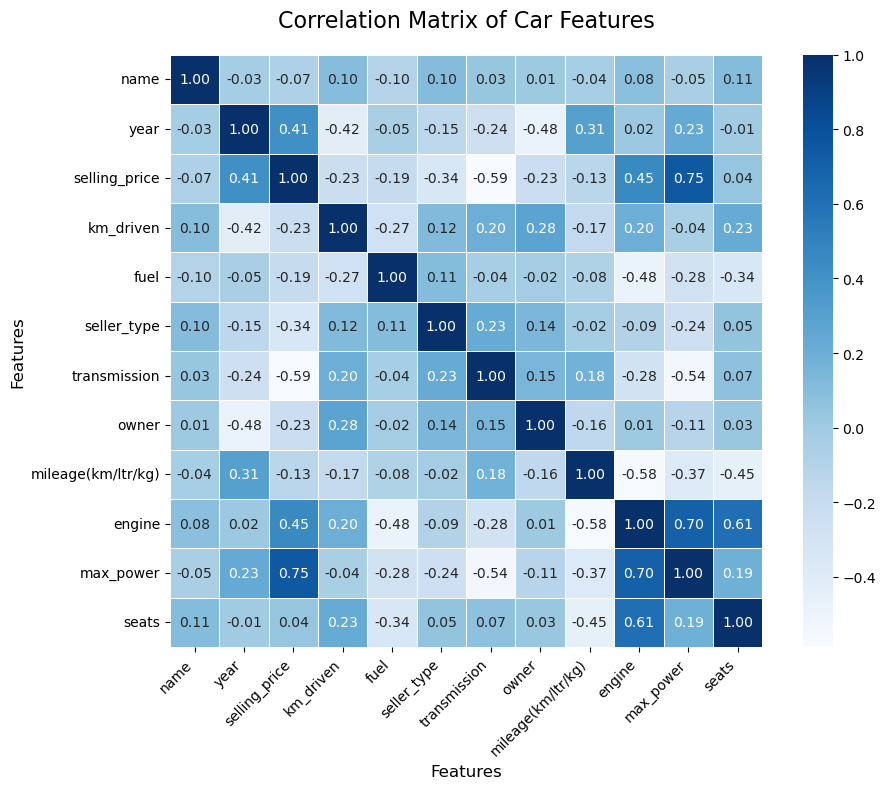

In [191]:
correlation = preprocessed_df.corr()
# sns.heatmap(correlation, cbar=True,square=True, fmt='.2f', annot=True, annot_kws={'size':8},cmap = 'Blues')
# plt.show()

# Giả sử 'correlation' là ma trận tương quan đã được tính từ preprocessed_df
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation, 
    cbar=True, 
    square=True, 
    fmt='.2f', 
    annot=True, 
    annot_kws={'size': 10},  # Tăng cỡ chữ của số trong ô
    cmap='Blues', 
    linewidths=0.5,  # Thêm đường viền giữa các ô
    linecolor='white'  # Màu viền trắng
)

# Thêm tiêu đề
plt.title('Correlation Matrix of Car Features', fontsize=16, pad=20)

# Thêm nhãn trục
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Tùy chỉnh kích thước chữ của nhãn trục
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

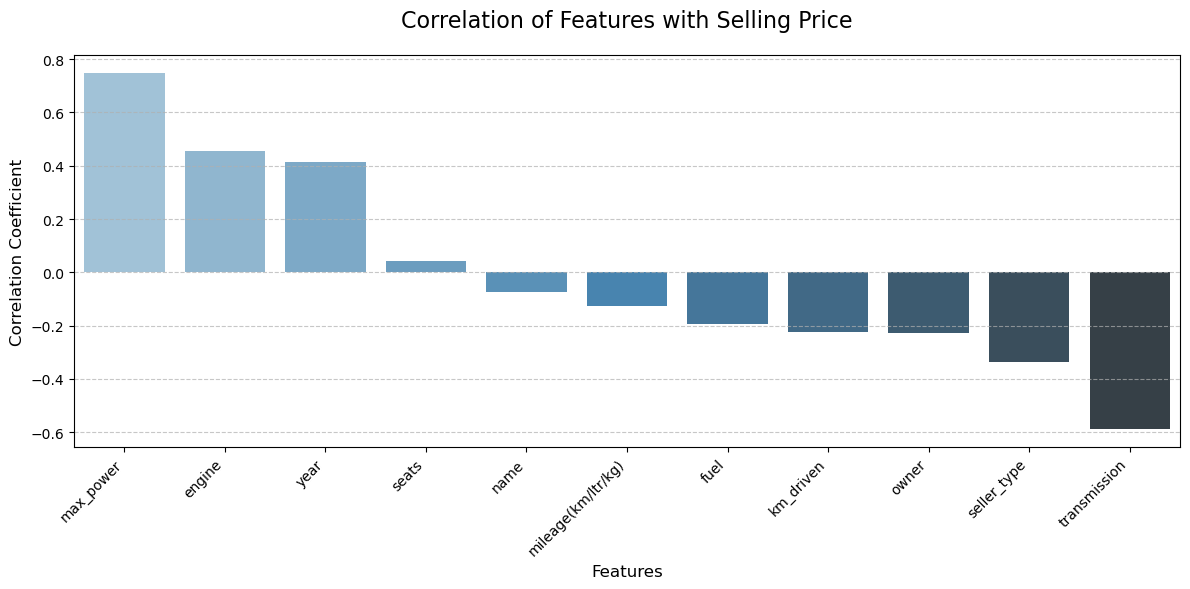

In [192]:
# plot correlation degree between selling price column and other columns
# correlation['selling_price'].drop('selling_price').sort_values(ascending = False).plot(kind = 'bar')

# Tính tương quan với 'selling_price' và loại bỏ chính nó
corr_with_price = correlation['selling_price'].drop('selling_price').sort_values(ascending=False)

# Vẽ bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=corr_with_price.index, y=corr_with_price.values, hue=corr_with_price.index, palette='Blues_d')

# Thêm tiêu đề
plt.title('Correlation of Features with Selling Price', fontsize=16, pad=20)

# Thêm nhãn trục
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)

# Tùy chỉnh nhãn trục X
plt.xticks(rotation=45, ha='right', fontsize=10)

# Thêm lưới nhẹ
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

## Handling outliers

name                  -0.052374
year                  -1.072293
km_driven             11.170910
fuel                   0.177285
seller_type           -0.930304
transmission          -2.211584
owner                  1.258876
mileage(km/ltr/kg)    -0.144647
engine                 1.151019
max_power              1.660637
seats                  1.997244
dtype: float64


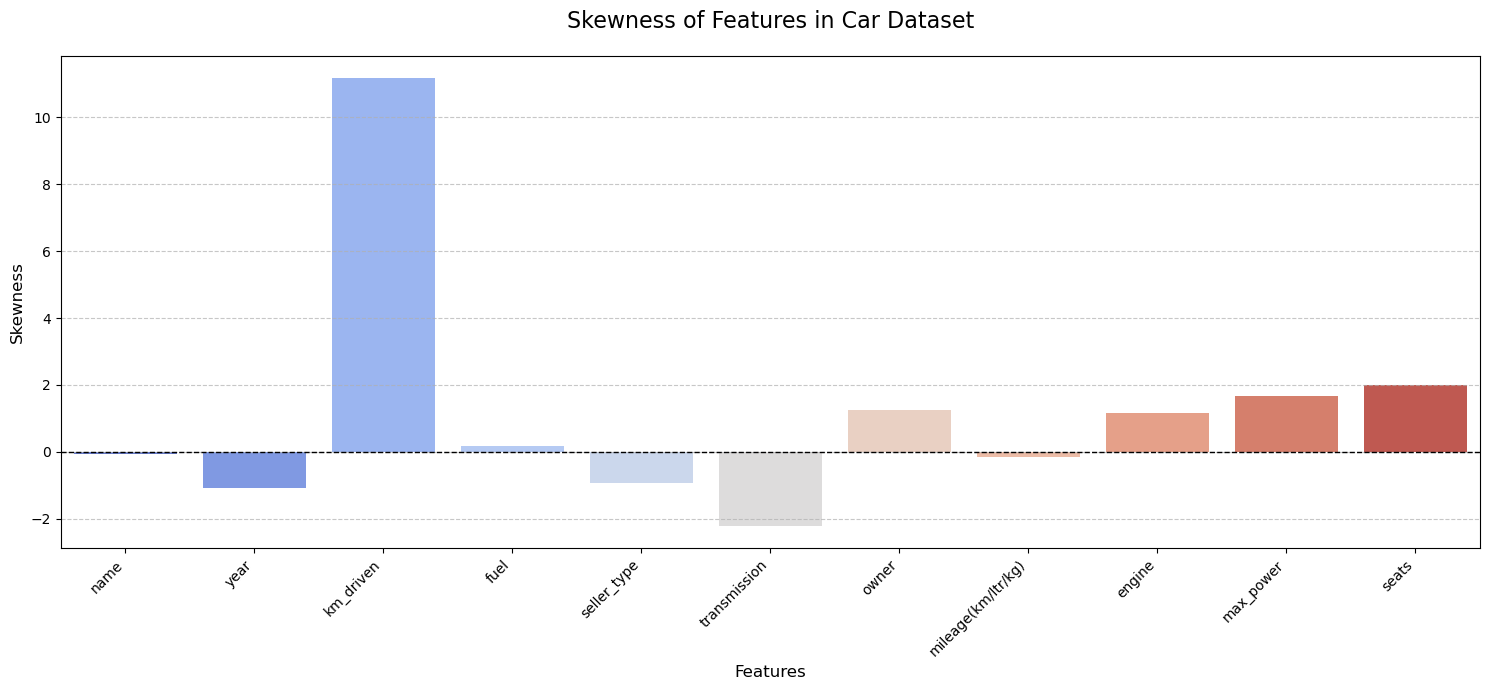

In [193]:
# Check Skewness for each column
# column_skewed = preprocessed_df.columns.drop('selling_price')
# skewness = preprocessed_df.drop(columns = ['selling_price']).skew()
# print(skewness)

# plt.figure(figsize = (15,7))
# plt.bar(column_skewed, skewness)
# plt.show()

# Tính skewness, loại bỏ 'selling_price'
column_skewed = preprocessed_df.columns.drop('selling_price')
skewness = preprocessed_df.drop(columns=['selling_price']).skew()
print(skewness)

# Vẽ bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x=column_skewed, y=skewness, hue=column_skewed, palette='coolwarm')

# Thêm tiêu đề
plt.title('Skewness of Features in Car Dataset', fontsize=16, pad=20)

# Thêm nhãn trục
plt.xlabel('Features', fontsize=12)
plt.ylabel('Skewness', fontsize=12)

# Thêm đường tham chiếu tại y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Tùy chỉnh nhãn trục X
plt.xticks(rotation=45, ha='right', fontsize=10)

# Thêm lưới nhẹ
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

In [194]:
# Visualize box plot for dataframe
# plt.figure(figsize = (15,10))
# sns.boxplot(data = preprocessed_df.drop(columns = ['selling_price']))
# plt.show()

# Vẽ box plot
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=preprocessed_df.drop(columns=['selling_price']), palette='pastel')

# # Thêm tiêu đề
# plt.title('Box Plot of Car Features (Excluding Selling Price)', fontsize=16, pad=20)

# # Thêm nhãn trục
# plt.xlabel('Features', fontsize=12)
# plt.ylabel('Values', fontsize=12)

# # Tùy chỉnh nhãn trục X
# plt.xticks(rotation=45, ha='right', fontsize=10)

# # Thêm lưới nhẹ
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# # Điều chỉnh bố cục
# plt.tight_layout()
# plt.show()

In [195]:
# Find skewness for km driven column alone to handle it 
preprocessed_df['km_driven'].skew()

np.float64(11.170909783549087)

In [196]:
# Handle skewness of km driven columns by taking the log function for it
preprocessed_df['km_driven'] = np.log(preprocessed_df['km_driven'])

In [197]:
# Find skewness for km driven column after we handled it
preprocessed_df['km_driven'].skew()

np.float64(-1.2850452454119017)

name                 -0.052374
year                 -1.072293
km_driven            -1.285045
fuel                  0.177285
seller_type          -0.930304
transmission         -2.211584
owner                 1.258876
mileage(km/ltr/kg)   -0.144647
engine                1.151019
max_power             1.660637
seats                 1.997244
dtype: float64


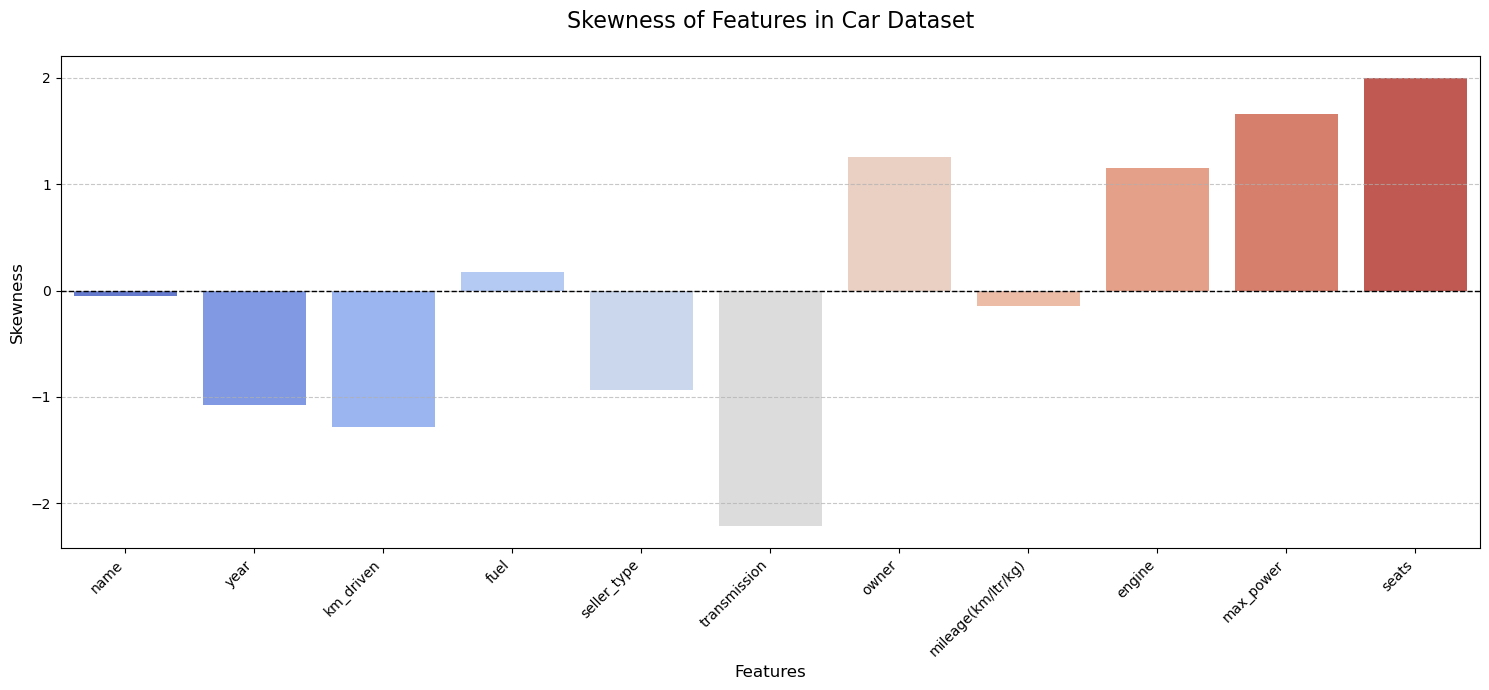

In [198]:
# Check Skewness for each column after the handling process
# column_skewed = preprocessed_df.columns.drop('selling_price')
# skewness = preprocessed_df.drop(columns = ['selling_price']).skew()

# plt.figure(figsize = (15,7))
# plt.bar(column_skewed, skewness)


# Tính skewness, loại bỏ 'selling_price'
column_skewed = preprocessed_df.columns.drop('selling_price')
skewness = preprocessed_df.drop(columns=['selling_price']).skew()
print(skewness)

# Vẽ bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x=column_skewed, y=skewness, hue=column_skewed, palette='coolwarm')

# Thêm tiêu đề
plt.title('Skewness of Features in Car Dataset', fontsize=16, pad=20)

# Thêm nhãn trục
plt.xlabel('Features', fontsize=12)
plt.ylabel('Skewness', fontsize=12)

# Thêm đường tham chiếu tại y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Tùy chỉnh nhãn trục X
plt.xticks(rotation=45, ha='right', fontsize=10)

# Thêm lưới nhẹ
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()

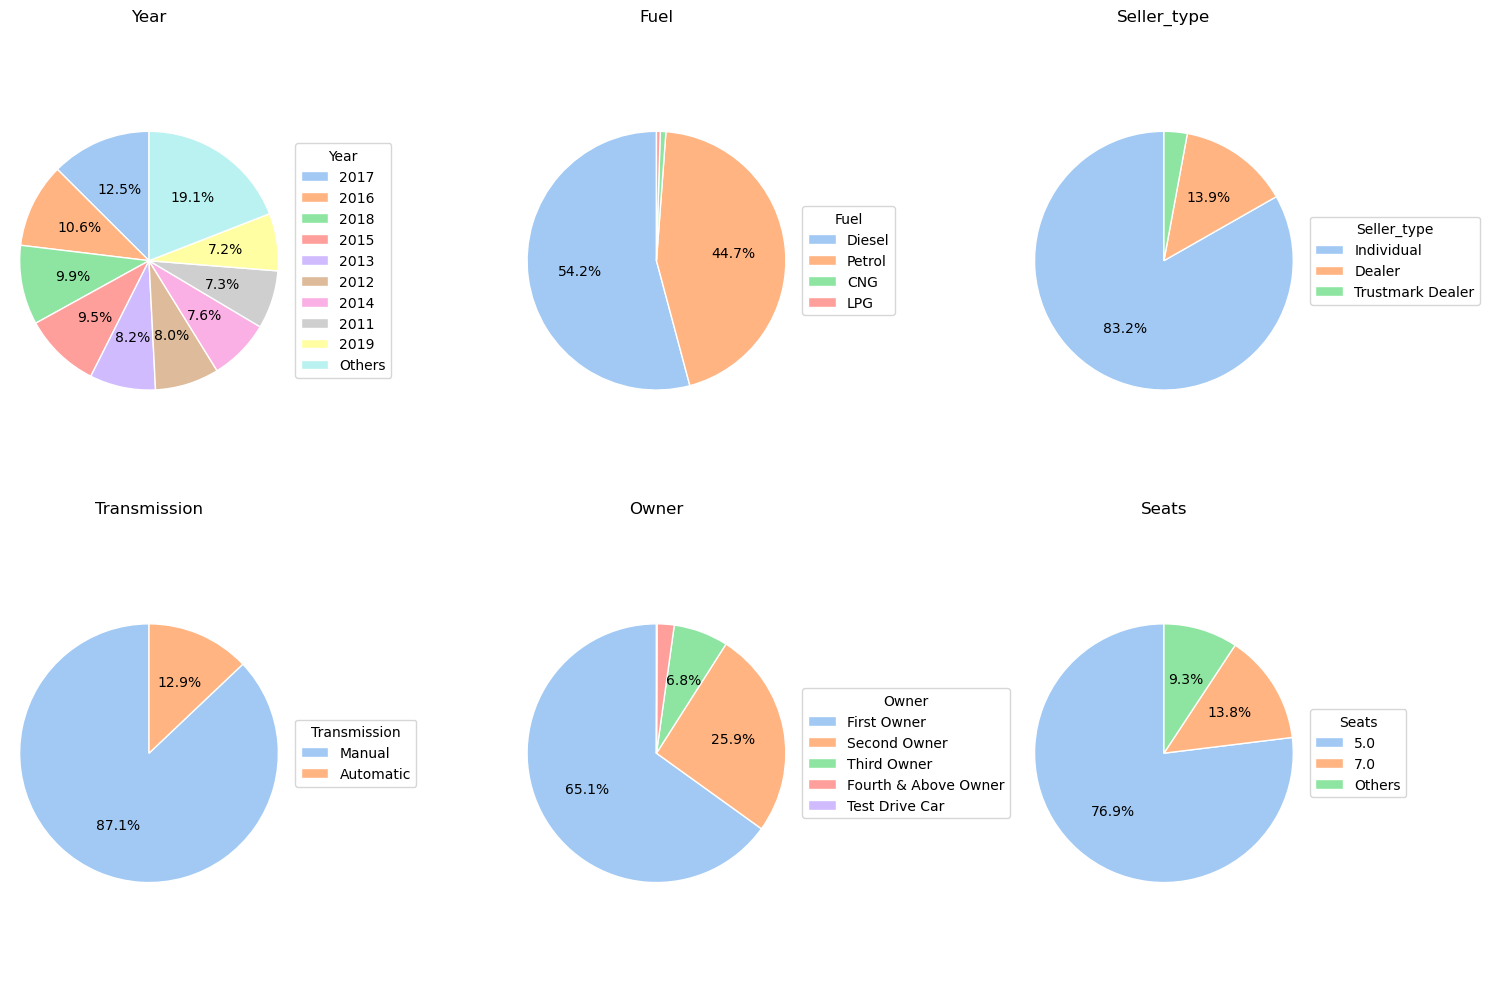

In [199]:
# categorical_columns = ['year', 'fuel','seller_type', 'transmission','owner','seats']
# plt.figure(figsize = (8, 6))
# for index, col in enumerate(categorical_columns):
#     values_count = preprocessed_df[col].value_counts()
#     plt.subplot(2, 3, index + 1)
#     plt.axis('off')
#     plt.title(col)
#     plt.pie(values_count, labels=values_count.index)
# plt.show()

# Giả sử preprocessed_df và label_encoders đã được định nghĩa
categorical_columns = ['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

# Thiết lập kích thước figure
plt.figure(figsize=(15, 10))

# Ngưỡng phần trăm để gộp (có thể thay đổi, ví dụ: 5%)
threshold = 5.0

# Duyệt qua từng cột để vẽ pie chart
for index, col in enumerate(categorical_columns):
    # Đếm số lượng giá trị
    values_count = preprocessed_df[col].value_counts()
    total = values_count.sum()
    
    # Nếu là 'year' hoặc 'seats', gộp các giá trị nhỏ
    if col in ['year', 'seats']:
        # Tính phần trăm cho từng giá trị
        percentages = (values_count / total * 100)
        # Lọc các giá trị lớn hơn ngưỡng
        major_values = percentages[percentages >= threshold]
        # Gộp các giá trị nhỏ thành 'Others'
        others_sum = percentages[percentages < threshold].sum()
        if others_sum > 0:
            filtered_values = pd.concat([major_values, pd.Series([others_sum], index=['Others'])])
        else:
            filtered_values = major_values
        values_count = (filtered_values / 100 * total).astype(int)  # Chuyển lại thành số đếm
    else:
        filtered_values = values_count / total * 100  # Giữ nguyên phần trăm
    
    # Xử lý nhãn
    if col in label_encoders:
        labels = [label_encoders[col].inverse_transform([i])[0] for i in values_count.index]
    else:
        labels = values_count.index.astype(str)  # Chuyển 'year', 'seats' thành chuỗi
    
    if col in ['year', 'seats'] and 'Others' in filtered_values.index:
        labels = list(major_values.index.astype(str)) + ['Others']
    
    # Tạo subplot
    plt.subplot(2, 3, index + 1)
    
    # Vẽ pie chart
    colors = sns.color_palette('pastel', len(values_count))
    wedges, texts, autotexts = plt.pie(
        values_count,
        labels=None,
        autopct=lambda p: f'{p:.1f}%' if p >= threshold else '',  # Chỉ hiển thị % nếu >= ngưỡng
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},
        textprops={'fontsize': 10}
    )
    
    # Tùy chỉnh phần trăm
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(10)
    
    # Tiêu đề
    plt.title(col.capitalize(), fontsize=12, pad=10)
    
    # Thêm legend
    plt.legend(
        wedges,
        labels,
        title=col.capitalize(),
        loc='center left',
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=10
    )
    
    # Đảm bảo pie chart tròn
    plt.axis('equal')

# Điều chỉnh bố cục
plt.tight_layout()
plt.show()


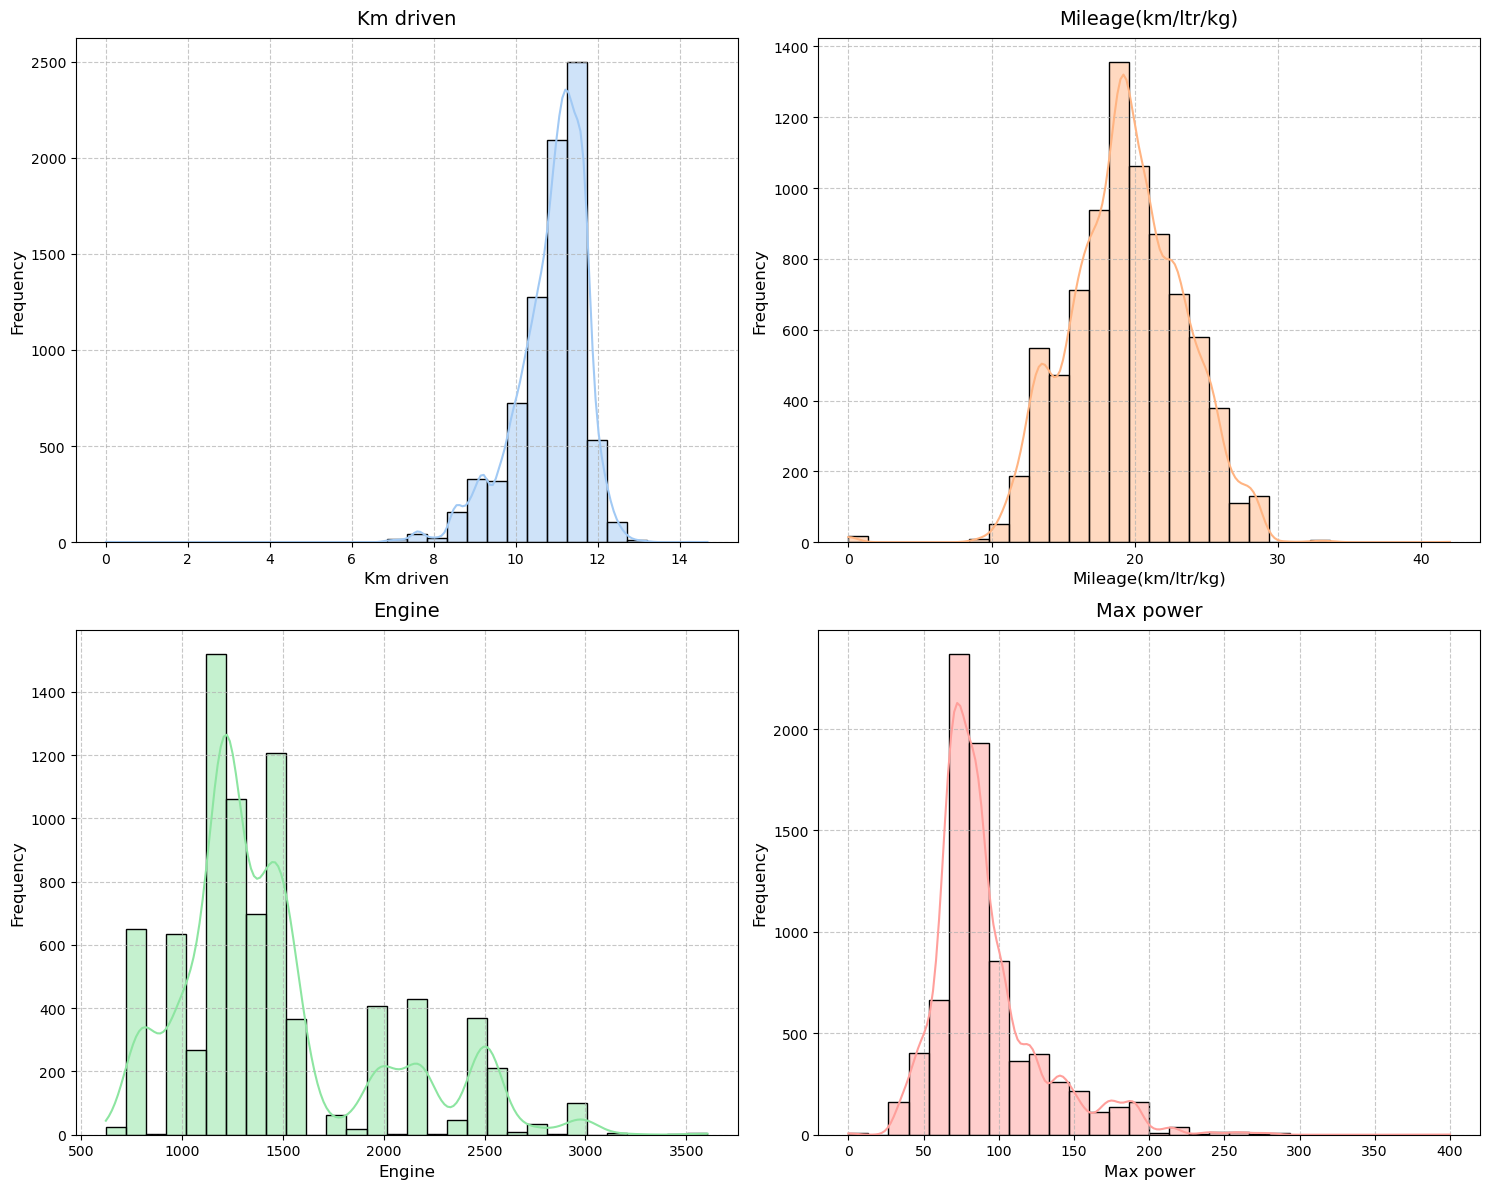

In [200]:
# continuous_columns = ['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power']
# plt.figure(figsize = (15,12))
# for index, col in enumerate(continuous_columns):
#     plt.subplot(2, 2, index + 1)
#     plt.axis('off')
#     plt.title(col)
#     plt.hist(preprocessed_df[col])
# plt.show()


# Danh sách các cột liên tục
continuous_columns = ['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power']

# Thiết lập kích thước figure
plt.figure(figsize=(15, 12))

# Duyệt qua từng cột để vẽ histogram
for index, col in enumerate(continuous_columns):
    # Tạo subplot (2 hàng, 2 cột)
    plt.subplot(2, 2, index + 1)
    
    # Vẽ histogram với seaborn để đẹp hơn
    sns.histplot(data=preprocessed_df[col], bins=30, color=sns.color_palette('pastel')[index], kde=True)
    
    # Thêm tiêu đề
    plt.title(col.replace('_', ' ').capitalize(), fontsize=14, pad=10)
    
    # Thêm nhãn trục
    plt.xlabel(col.replace('_', ' ').capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Thêm lưới nhẹ để dễ đọc
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Tùy chỉnh các trục
    plt.tick_params(axis='both', labelsize=10)

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()
plt.show()

In [201]:
preprocessed_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,1307,2014,450000,11.887931,1,1,1,0,23.40,1248.0,74.00,5.0
1,1607,2014,370000,11.695247,1,1,1,2,21.14,1498.0,103.52,5.0
2,385,2006,158000,11.849398,3,1,1,4,17.70,1497.0,78.00,5.0
3,781,2010,225000,11.751942,1,1,1,0,23.00,1396.0,90.00,5.0
4,1349,2007,130000,11.695247,3,1,1,0,16.10,1298.0,88.20,5.0


In [202]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   int64  
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   float64
 4   fuel                8128 non-null   int64  
 5   seller_type         8128 non-null   int64  
 6   transmission        8128 non-null   int64  
 7   owner               8128 non-null   int64  
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 762.1 KB


## Save the preprocessed data and label encoder

In [203]:
preprocessed_df.to_csv('preprocessed_cardekho.csv', index=False)
joblib.dump(label_encoders, 'label_encoders.sav')


['label_encoders.sav']

# Modeling

In [204]:
# 1. Đọc dữ liệu
preprocessed_dff = pd.read_csv("preprocessed_cardekho.csv")


In [205]:
# Split data into input and label data
X = preprocessed_df.drop(columns = ['selling_price'])
Y = preprocessed_df['selling_price']
print(f'size of input data {X.shape}')
print(f'size of input data {Y.shape}')

size of input data (8128, 11)
size of input data (8128,)


In [206]:
# Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.12, random_state = 42)
print(f'x train size {x_train.shape}, x test size {x_test.shape}')
print(f'y train size {y_train.shape}, y test size {y_test.shape}')

x train size (7152, 11), x test size (976, 11)
y train size (7152,), y test size (976,)


In [207]:
# Chuẩn hóa dữ liệu (fit trên train, transform trên test)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [ ]:
# Khởi tạo các mô hình
models = {
    'Linear Regression': LinearRegression(), 
    'Ridge Regression': Ridge(), 
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(), 
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN Regressor': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor()
}



In [209]:
models = {
    'Linear Regression': LinearRegression(), 
    'Ridge': Ridge(), 
    'Lasso': Lasso(), 
    'ElasticNet': ElasticNet(), 
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = []
best_model = None
best_model_name = None
best_mse = float('inf')  # Giá trị MSE lớn để bắt đầu so sánh

for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(x_train_scaled, y_train)
    
    # Dự đoán trên tập train và test
    train_pred = model.predict(x_train_scaled)
    test_pred = model.predict(x_test_scaled)
    
    # Tính MSE
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    # Lưu kết quả
    results.append({
        'Model': name,
        'Train MSE': train_mse,
        'Test MSE': test_mse
    })
    
    # Cập nhật mô hình tốt nhất (nếu test_mse thấp hơn)
    if test_mse < best_mse:
        best_mse = test_mse
        best_model = model
        best_model_name = name

df_results = pd.DataFrame(results)
df_results


,Model,Train MSE,Test MSE
0,Linear Regression,1.996983e+11,2.195279e+11
1,Ridge,1.996983e+11,2.195334e+11
2,Lasso,1.996983e+11,2.195278e+11
3,ElasticNet,2.212891e+11,2.495556e+11
4,Decision Tree,9.333440e+07,1.953682e+10
5,Gradient Boosting,1.692173e+10,2.174585e+10
6,KNN,2.851257e+10,3.542946e+10
7,Random Forest,3.018858e+09,1.484677e+10


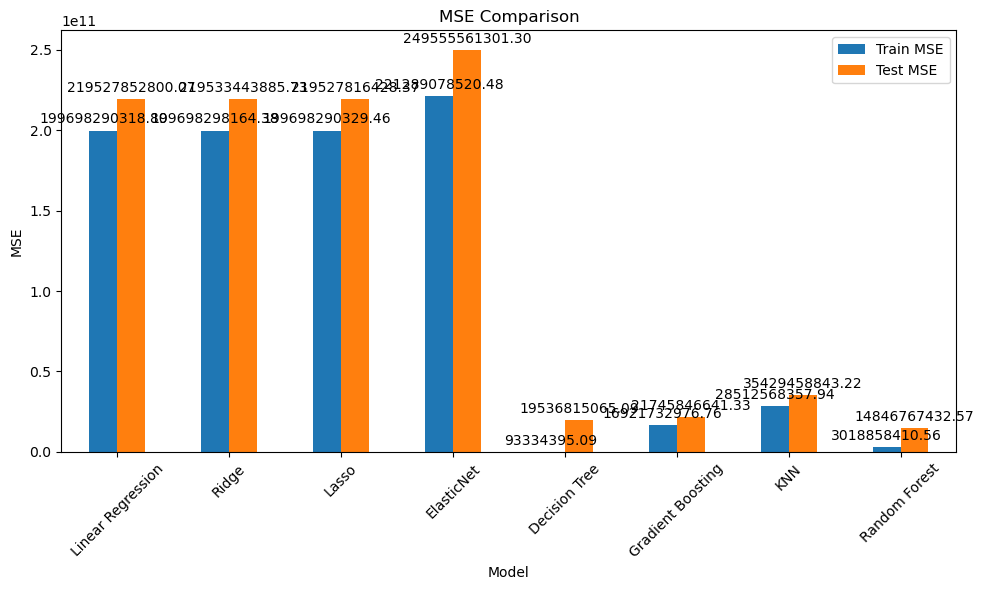

Mô hình tốt nhất (theo Test MSE): Random Forest với Test MSE = 14846767432.57


In [ ]:
# Vẽ biểu đồ cột so sánh Train MSE và Test MSE
df_results_plot = df_results.set_index('Model')[['Train MSE', 'Test MSE']]
ax = df_results_plot.plot(kind='bar', figsize=(10, 6), rot=45, title="MSE Comparison")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.ylabel("MSE")
plt.tight_layout()
plt.show()

# Xem mô hình tốt nhất
print(f"Mô hình tốt nhất (theo Test MSE): {best_model_name} với Test MSE = {best_mse:.2f}")



In [211]:
# Lưu bằng joblib
joblib.dump(best_model, "best_model.pkl")
print(f"Đã lưu {best_model_name} thành file best_model.pkl")


Đã lưu Random Forest thành file best_model.pkl


## Xem mức độ quan trọng của các thuộc tính đối với mô hình cây (RandomForest, GradientBoosting, DecisionTree)

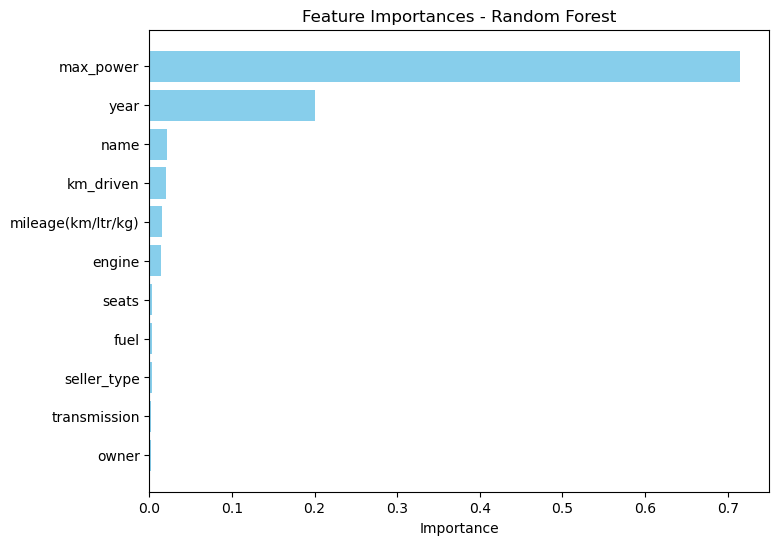

In [212]:
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X.columns
    
    # Sắp xếp giảm dần theo độ quan trọng
    sorted_idx = np.argsort(importances)[::-1]
    sorted_importances = importances[sorted_idx]
    sorted_features = feature_names[sorted_idx]
    
    plt.figure(figsize=(8, 6))
    plt.barh(sorted_features, sorted_importances, color='skyblue')
    plt.gca().invert_yaxis()  # Để feature cao nhất ở trên cùng
    plt.title(f"Feature Importances - {best_model_name}")
    plt.xlabel("Importance")
    plt.show()
else:
    print(f"Mô hình {best_model_name} không có thuộc tính 'feature_importances_'")


## Save the best model

In [213]:
loaded_model = joblib.load("best_model.pkl")
loaded_model.predict(x_test_scaled)


array([ 170280.        ,  531609.94      ,  451659.8       ,
        164340.        ,  379439.985     ,  187270.        ,
        390239.99      ,  547833.33333333,  141870.        ,
         87050.        ,  619040.        ,  546169.96      ,
        180420.        , 1544480.        , 1063710.        ,
        393203.32333333,  127080.        ,  488170.        ,
        810329.98      ,  299730.        ,  835189.9       ,
        206809.96      , 2675566.42565411,  274060.        ,
        203689.89      ,  636500.        ,  591935.        ,
       3755000.        ,  783071.18666667,  998930.        ,
        514634.82      ,  172180.        ,  220829.93      ,
        476399.99      ,  759700.        ,  582847.02380952,
        160630.        ,  964799.51      ,  625560.        ,
        522170.        ,  625691.66666667,  332840.        ,
         73500.9       ,  335239.87      ,  285964.97      ,
        529599.99      ,  597569.99      ,  301999.96      ,
        249949.98      ,